# Pandas Python Workshop

*This tutorial is from Dr. McCray*: https://github.com/mccrayc/tutorials/blob/master/3_pandas/Python_Workshop_Pandas_29_March_2019.ipynb

The motivtion for this tutorial is to be able to read .csv files and extract data using `pandas`. The `pandas` dataframe works a lot like an Excel spreadsheet, but much more powerful. Let's begin with an example of how `pandas` works by introducing dictionaries (an introduction to `pandas` basics can be found here: https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)


In [30]:
import pandas as pd 
import matplotlib.pyplot as plt

my_dict = {
    'name'        : ["John", "Diane", "Joe", "Danielle", "Ashley", "Sam"],
    'age'         : [20, 55, 35, 40, 21, 35],
    'salary'      : [41000, 73000, 68000, 65000, 50000, 55000],
    'designation' : ["VP", "CEO", "CFO", "VP", "VP", "VP"]
}

my_dict

{'name': ['John', 'Diane', 'Joe', 'Danielle', 'Ashley', 'Sam'],
 'age': [20, 55, 35, 40, 21, 35],
 'salary': [41000, 73000, 68000, 65000, 50000, 55000],
 'designation': ['VP', 'CEO', 'CFO', 'VP', 'VP', 'VP']}

In [31]:
my_dict['age']

[20, 55, 35, 40, 21, 35]

Let's say we want to get the designation for employee Sam. We can do this two ways using `pandas`:
- **Series**, which are 1-dimensional labeled arrays, resembling dictionaries
- **DataFrame**, (most commonly used) which are 2-dimensional, like a spreadsheet, or a dictionary of Series

In [32]:
employees = pd.DataFrame(my_dict)
employees

,name,age,salary,designation
0,John,20,41000,VP
1,Diane,55,73000,CEO
2,Joe,35,68000,CFO
3,Danielle,40,65000,VP
4,Ashley,21,50000,VP
5,Sam,35,55000,VP


Clearly, `DataFrame` consists of **rows** and **columns**. Each column has the same datatype.
We can set a column (or multiple columns) as the **index**

In [33]:
employees.set_index('name', inplace=True)
employees

,age,salary,designation
name,,,
John,20,41000,VP
Diane,55,73000,CEO
Joe,35,68000,CFO
Danielle,40,65000,VP
Ashley,21,50000,VP
Sam,35,55000,VP


In [34]:
print(employees.index)
print(employees.columns)

Index(['John', 'Diane', 'Joe', 'Danielle', 'Ashley', 'Sam'], dtype='object', name='name')
Index(['age', 'salary', 'designation'], dtype='object')


In [35]:
employees.loc['John']

age               20
salary         41000
designation       VP
Name: John, dtype: object

In [36]:
employees.iloc[3] #index location

age               40
salary         65000
designation       VP
Name: Danielle, dtype: object

Note that we can subset dataframes based on values of each column.

In [37]:
#Employees where age > 30
employees[employees.age > 30]

,age,salary,designation
name,,,
Diane,55,73000,CEO
Joe,35,68000,CFO
Danielle,40,65000,VP
Sam,35,55000,VP


In [38]:
employees[employees['designation'] == "VP"]

,age,salary,designation
name,,,
John,20,41000,VP
Danielle,40,65000,VP
Ashley,21,50000,VP
Sam,35,55000,VP


We can easily set values or add new columns.

In [39]:
employees.loc['John', 'age'] = 22
employees

,age,salary,designation
name,,,
John,22,41000,VP
Diane,55,73000,CEO
Joe,35,68000,CFO
Danielle,40,65000,VP
Ashley,21,50000,VP
Sam,35,55000,VP


In [40]:
employees['city'] = 'Montreal'
employees

,age,salary,designation,city
name,,,,
John,22,41000,VP,Montreal
Diane,55,73000,CEO,Montreal
Joe,35,68000,CFO,Montreal
Danielle,40,65000,VP,Montreal
Ashley,21,50000,VP,Montreal
Sam,35,55000,VP,Montreal


In [41]:
employees.loc['Diane', 'city'] = 'Toronto'
employees

,age,salary,designation,city
name,,,,
John,22,41000,VP,Montreal
Diane,55,73000,CEO,Toronto
Joe,35,68000,CFO,Montreal
Danielle,40,65000,VP,Montreal
Ashley,21,50000,VP,Montreal
Sam,35,55000,VP,Montreal


With `DataFrame`, we can perform numerous math operations and get descriptive statistics easily.

In [42]:
employees.age.describe()

count     6.000000
mean     34.666667
std      12.564500
min      21.000000
25%      25.250000
50%      35.000000
75%      38.750000
max      55.000000
Name: age, dtype: float64

In [44]:
employees['age']+10

name
John        32
Diane       65
Joe         45
Danielle    50
Ashley      31
Sam         45
Name: age, dtype: int64

In [46]:
employees.designation.value_counts()

VP     4
CEO    1
CFO    1
Name: designation, dtype: int64

`Pandas` is also extremely powerful for working with **time series** and dates.

In [47]:
pd.date_range('1/1/2019', '1/12/2019')

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12'],
              dtype='datetime64[ns]', freq='D')

<AxesSubplot:xlabel='age', ylabel='salary'>

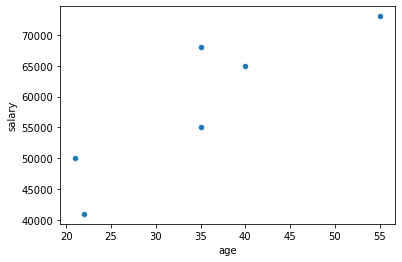

In [50]:
employees.plot.scatter(x='age', y='salary')

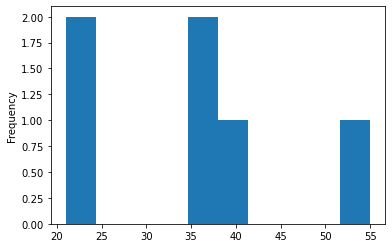

In [54]:
employees.age.plot.hist()
plt.show()

# Meteorology Example


## Link to NCEP: https://www.ncdc.noaa.gov/cdo-web/search